# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm
# Import API key
# from api_keys import api_key

#define API key
api_key = "YOUR_API_KEY"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

In [ ]:
# reduce the size of the cities list to 45 items, so as to not get banned by api server when doing too many calls
# x = len(cities) - 45
# cities = cities[:-x]
# len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# create a settings dictionary for handling the information
settings = {"units": "imperial", "appid": api_key}

# create an empty data frame to hold API call data
WeatherPy_df = pd.DataFrame(columns = ["City","Cloudiness", "Country", "Date", "Max Temp", "Wind Speed", "Lat","Lng", "Humidity"])

count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data.
sets = 0 # counter to count the number of call sets
index = 0 # index for the data frame WeatherPy data frame
#Get current time
t0 =time.time()
print(f'Beginning Data Retrieval \n ........................')
for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={api_key}')
        city_stats = owm.get_current(city, **settings)
        WeatherPy_df.set_value(index, "City", city_stats["name"])
        WeatherPy_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherPy_df.set_value(index, "Country", city_stats("sys.country"))
        WeatherPy_df.set_value(index, "Date", city_stats("dt"))
        WeatherPy_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherPy_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        WeatherPy_df.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherPy_df.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherPy_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("end of stats loop")
print(f'Could not get data for {err} cities')

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 0 | esperance
http://api.openweathermap.org/data/2.5/weather?q=esperance&units=imperial&APPID=_MY_API_KEY_


C:\Users\Aaron\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Aaron\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Aaron\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Aaron\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Aaron\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Aaron\Anaconda3\lib\s

Processing Record 2 of Set 0 | yellowknife
http://api.openweathermap.org/data/2.5/weather?q=yellowknife&units=imperial&APPID=_MY_API_KEY_
Processing Record 3 of Set 0 | sulina
http://api.openweathermap.org/data/2.5/weather?q=sulina&units=imperial&APPID=_MY_API_KEY_
HTTP Error 404: Not Found
Processing Record 4 of Set 0 | barentsburg
http://api.openweathermap.org/data/2.5/weather?q=barentsburg&units=imperial&APPID=_MY_API_KEY_
HTTP Error 404: Not Found
Processing Record 5 of Set 0 | busselton
http://api.openweathermap.org/data/2.5/weather?q=busselton&units=imperial&APPID=_MY_API_KEY_
Processing Record 6 of Set 0 | igrim
http://api.openweathermap.org/data/2.5/weather?q=igrim&units=imperial&APPID=_MY_API_KEY_
Processing Record 7 of Set 0 | araouane
http://api.openweathermap.org/data/2.5/weather?q=araouane&units=imperial&APPID=_MY_API_KEY_
Processing Record 8 of Set 0 | ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=imperial&APPID=_MY_API_KEY_
Processing Record 9 of

Processing Record 5 of Set 1 | carahue
http://api.openweathermap.org/data/2.5/weather?q=carahue&units=imperial&APPID=_MY_API_KEY_
Processing Record 6 of Set 1 | cururupu
http://api.openweathermap.org/data/2.5/weather?q=cururupu&units=imperial&APPID=_MY_API_KEY_
Processing Record 7 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?q=atuona&units=imperial&APPID=_MY_API_KEY_
Processing Record 8 of Set 1 | faanui
http://api.openweathermap.org/data/2.5/weather?q=faanui&units=imperial&APPID=_MY_API_KEY_
Processing Record 9 of Set 1 | muroto
http://api.openweathermap.org/data/2.5/weather?q=muroto&units=imperial&APPID=_MY_API_KEY_
Processing Record 10 of Set 1 | marsh harbour
http://api.openweathermap.org/data/2.5/weather?q=marsh%20harbour&units=imperial&APPID=_MY_API_KEY_
Processing Record 11 of Set 1 | lolua
http://api.openweathermap.org/data/2.5/weather?q=lolua&units=imperial&APPID=_MY_API_KEY_
HTTP Error 404: Not Found
Processing Record 12 of Set 1 | victoria
http://api.open

Processing Record 8 of Set 2 | hilo
http://api.openweathermap.org/data/2.5/weather?q=hilo&units=imperial&APPID=_MY_API_KEY_
Processing Record 9 of Set 2 | geraldton
http://api.openweathermap.org/data/2.5/weather?q=geraldton&units=imperial&APPID=_MY_API_KEY_
Processing Record 10 of Set 2 | nautla
http://api.openweathermap.org/data/2.5/weather?q=nautla&units=imperial&APPID=_MY_API_KEY_
Processing Record 11 of Set 2 | mataura
http://api.openweathermap.org/data/2.5/weather?q=mataura&units=imperial&APPID=_MY_API_KEY_
Processing Record 12 of Set 2 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?q=lavrentiya&units=imperial&APPID=_MY_API_KEY_
Processing Record 13 of Set 2 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?q=mys%20shmidta&units=imperial&APPID=_MY_API_KEY_
HTTP Error 404: Not Found
Processing Record 14 of Set 2 | tacoronte
http://api.openweathermap.org/data/2.5/weather?q=tacoronte&units=imperial&APPID=_MY_API_KEY_
Processing Record 15 of Set 2 | kavieng
htt

Processing Record 11 of Set 3 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?q=bambous%20virieux&units=imperial&APPID=_MY_API_KEY_
Processing Record 12 of Set 3 | harper
http://api.openweathermap.org/data/2.5/weather?q=harper&units=imperial&APPID=_MY_API_KEY_
Processing Record 13 of Set 3 | vao
http://api.openweathermap.org/data/2.5/weather?q=vao&units=imperial&APPID=_MY_API_KEY_
Processing Record 14 of Set 3 | machiques
http://api.openweathermap.org/data/2.5/weather?q=machiques&units=imperial&APPID=_MY_API_KEY_
Processing Record 15 of Set 3 | meulaboh
http://api.openweathermap.org/data/2.5/weather?q=meulaboh&units=imperial&APPID=_MY_API_KEY_
Processing Record 16 of Set 3 | mackay
http://api.openweathermap.org/data/2.5/weather?q=mackay&units=imperial&APPID=_MY_API_KEY_
Processing Record 17 of Set 3 | vardo
http://api.openweathermap.org/data/2.5/weather?q=vardo&units=imperial&APPID=_MY_API_KEY_
Processing Record 18 of Set 3 | lompoc
http://api.openweathermap.org/data/2

Processing Record 15 of Set 4 | lorengau
http://api.openweathermap.org/data/2.5/weather?q=lorengau&units=imperial&APPID=_MY_API_KEY_
Processing Record 16 of Set 4 | la orilla
http://api.openweathermap.org/data/2.5/weather?q=la%20orilla&units=imperial&APPID=_MY_API_KEY_
Processing Record 17 of Set 4 | cuamba
http://api.openweathermap.org/data/2.5/weather?q=cuamba&units=imperial&APPID=_MY_API_KEY_
Processing Record 18 of Set 4 | cedar city
http://api.openweathermap.org/data/2.5/weather?q=cedar%20city&units=imperial&APPID=_MY_API_KEY_
Processing Record 19 of Set 4 | nome
http://api.openweathermap.org/data/2.5/weather?q=nome&units=imperial&APPID=_MY_API_KEY_
Processing Record 20 of Set 4 | kodiak
http://api.openweathermap.org/data/2.5/weather?q=kodiak&units=imperial&APPID=_MY_API_KEY_
Processing Record 21 of Set 4 | lalmohan
http://api.openweathermap.org/data/2.5/weather?q=lalmohan&units=imperial&APPID=_MY_API_KEY_
Processing Record 22 of Set 4 | whitianga
http://api.openweathermap.org/dat

Processing Record 19 of Set 5 | anito
http://api.openweathermap.org/data/2.5/weather?q=anito&units=imperial&APPID=_MY_API_KEY_
Processing Record 20 of Set 5 | jacqueville
http://api.openweathermap.org/data/2.5/weather?q=jacqueville&units=imperial&APPID=_MY_API_KEY_
Processing Record 21 of Set 5 | buqayq
http://api.openweathermap.org/data/2.5/weather?q=buqayq&units=imperial&APPID=_MY_API_KEY_
HTTP Error 404: Not Found
Processing Record 22 of Set 5 | huntington
http://api.openweathermap.org/data/2.5/weather?q=huntington&units=imperial&APPID=_MY_API_KEY_
Processing Record 23 of Set 5 | port augusta
http://api.openweathermap.org/data/2.5/weather?q=port%20augusta&units=imperial&APPID=_MY_API_KEY_
Processing Record 24 of Set 5 | varzea grande
http://api.openweathermap.org/data/2.5/weather?q=varzea%20grande&units=imperial&APPID=_MY_API_KEY_
Processing Record 25 of Set 5 | egvekinot
http://api.openweathermap.org/data/2.5/weather?q=egvekinot&units=imperial&APPID=_MY_API_KEY_
Processing Record 2

Processing Record 23 of Set 6 | sitka
http://api.openweathermap.org/data/2.5/weather?q=sitka&units=imperial&APPID=_MY_API_KEY_
Processing Record 24 of Set 6 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?q=pangnirtung&units=imperial&APPID=_MY_API_KEY_
Processing Record 25 of Set 6 | anadyr
http://api.openweathermap.org/data/2.5/weather?q=anadyr&units=imperial&APPID=_MY_API_KEY_
Processing Record 26 of Set 6 | high rock
http://api.openweathermap.org/data/2.5/weather?q=high%20rock&units=imperial&APPID=_MY_API_KEY_
Processing Record 27 of Set 6 | sorong
http://api.openweathermap.org/data/2.5/weather?q=sorong&units=imperial&APPID=_MY_API_KEY_
Processing Record 28 of Set 6 | luwuk
http://api.openweathermap.org/data/2.5/weather?q=luwuk&units=imperial&APPID=_MY_API_KEY_
Processing Record 29 of Set 6 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?q=los%20llanos%20de%20aridane&units=imperial&APPID=_MY_API_KEY_
Processing Record 30 of Set 6 | bandarbeyla
htt

HTTP Error 404: Not Found
Processing Record 27 of Set 7 | denpasar
http://api.openweathermap.org/data/2.5/weather?q=denpasar&units=imperial&APPID=_MY_API_KEY_
Processing Record 28 of Set 7 | taganak
http://api.openweathermap.org/data/2.5/weather?q=taganak&units=imperial&APPID=_MY_API_KEY_
Processing Record 29 of Set 7 | chubbuck
http://api.openweathermap.org/data/2.5/weather?q=chubbuck&units=imperial&APPID=_MY_API_KEY_
Processing Record 30 of Set 7 | turek
http://api.openweathermap.org/data/2.5/weather?q=turek&units=imperial&APPID=_MY_API_KEY_
Processing Record 31 of Set 7 | marsaxlokk
http://api.openweathermap.org/data/2.5/weather?q=marsaxlokk&units=imperial&APPID=_MY_API_KEY_
Processing Record 32 of Set 7 | jabiru
http://api.openweathermap.org/data/2.5/weather?q=jabiru&units=imperial&APPID=_MY_API_KEY_
HTTP Error 404: Not Found
Processing Record 33 of Set 7 | hanzhong
http://api.openweathermap.org/data/2.5/weather?q=hanzhong&units=imperial&APPID=_MY_API_KEY_
Processing Record 34 of S

HTTP Error 404: Not Found
Processing Record 31 of Set 8 | viedma
http://api.openweathermap.org/data/2.5/weather?q=viedma&units=imperial&APPID=_MY_API_KEY_
Processing Record 32 of Set 8 | hofn
http://api.openweathermap.org/data/2.5/weather?q=hofn&units=imperial&APPID=_MY_API_KEY_
Processing Record 33 of Set 8 | anloga
http://api.openweathermap.org/data/2.5/weather?q=anloga&units=imperial&APPID=_MY_API_KEY_
Processing Record 34 of Set 8 | tortoli
http://api.openweathermap.org/data/2.5/weather?q=tortoli&units=imperial&APPID=_MY_API_KEY_
Processing Record 35 of Set 8 | mustafabad
http://api.openweathermap.org/data/2.5/weather?q=mustafabad&units=imperial&APPID=_MY_API_KEY_
Processing Record 36 of Set 8 | hamilton
http://api.openweathermap.org/data/2.5/weather?q=hamilton&units=imperial&APPID=_MY_API_KEY_
Processing Record 37 of Set 8 | takoradi
http://api.openweathermap.org/data/2.5/weather?q=takoradi&units=imperial&APPID=_MY_API_KEY_
Processing Record 38 of Set 8 | namie
http://api.openweat

Processing Record 35 of Set 9 | nouakchott
http://api.openweathermap.org/data/2.5/weather?q=nouakchott&units=imperial&APPID=_MY_API_KEY_
Processing Record 36 of Set 9 | te anau
http://api.openweathermap.org/data/2.5/weather?q=te%20anau&units=imperial&APPID=_MY_API_KEY_
Processing Record 37 of Set 9 | chittur
http://api.openweathermap.org/data/2.5/weather?q=chittur&units=imperial&APPID=_MY_API_KEY_
Processing Record 38 of Set 9 | eldikan
http://api.openweathermap.org/data/2.5/weather?q=eldikan&units=imperial&APPID=_MY_API_KEY_
HTTP Error 404: Not Found
Processing Record 39 of Set 9 | cockburn town
http://api.openweathermap.org/data/2.5/weather?q=cockburn%20town&units=imperial&APPID=_MY_API_KEY_
Processing Record 40 of Set 9 | dovers
http://api.openweathermap.org/data/2.5/weather?q=dovers&units=imperial&APPID=_MY_API_KEY_
Processing Record 41 of Set 9 | koronowo
http://api.openweathermap.org/data/2.5/weather?q=koronowo&units=imperial&APPID=_MY_API_KEY_
Processing Record 42 of Set 9 | ran

Processing Record 37 of Set 10 | westport
http://api.openweathermap.org/data/2.5/weather?q=westport&units=imperial&APPID=_MY_API_KEY_
Processing Record 38 of Set 10 | bogorodskoye
http://api.openweathermap.org/data/2.5/weather?q=bogorodskoye&units=imperial&APPID=_MY_API_KEY_
Processing Record 39 of Set 10 | sanford
http://api.openweathermap.org/data/2.5/weather?q=sanford&units=imperial&APPID=_MY_API_KEY_
Processing Record 40 of Set 10 | mlowo
http://api.openweathermap.org/data/2.5/weather?q=mlowo&units=imperial&APPID=_MY_API_KEY_
Processing Record 41 of Set 10 | lokosovo
http://api.openweathermap.org/data/2.5/weather?q=lokosovo&units=imperial&APPID=_MY_API_KEY_
Processing Record 42 of Set 10 | tulcingo
http://api.openweathermap.org/data/2.5/weather?q=tulcingo&units=imperial&APPID=_MY_API_KEY_
HTTP Error 404: Not Found
Processing Record 43 of Set 10 | necochea
http://api.openweathermap.org/data/2.5/weather?q=necochea&units=imperial&APPID=_MY_API_KEY_
Processing Record 44 of Set 10 | upe

Processing Record 39 of Set 11 | kuytun
http://api.openweathermap.org/data/2.5/weather?q=kuytun&units=imperial&APPID=_MY_API_KEY_
Processing Record 40 of Set 11 | reitz
http://api.openweathermap.org/data/2.5/weather?q=reitz&units=imperial&APPID=_MY_API_KEY_
end of stats loop
Could not get data for 62 cities


In [6]:
# Display the count of cities with weather data
WeatherPy_df.count()

City          528
Cloudiness    528
Country       528
Date          528
Max Temp      528
Wind Speed    528
Lat           528
Lng           528
Humidity      528
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# export to csv file
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

# Display the city weather data frame
WeatherPy_df.head()

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Esperance,20,TT,1541631600,82.4,3.36,10.24,-61.45,78
1,Yellowknife,75,CA,1541631120,12.2,2.24,62.45,-114.38,85
2,Busselton,32,AU,1541633502,58.49,8.75,-33.64,115.35,100
3,Igrim,24,RU,1541633502,11.82,14.56,63.19,64.42,75
4,Araouane,0,ML,1541633502,69.65,6.51,18.9,-3.53,30


In [8]:
# get shape of data frame
WeatherPy_df.shape

(528, 9)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
import seaborn as sns

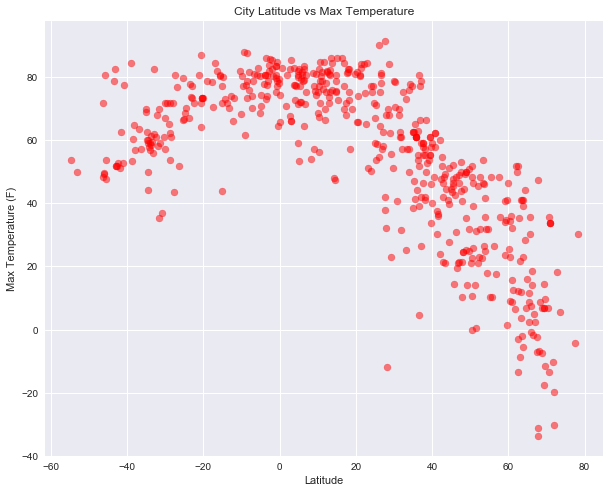

In [11]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature')
plt.show()

#### Latitude vs. Humidity Plot

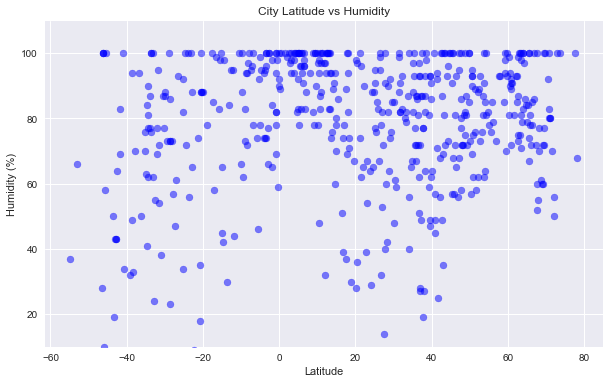

In [13]:
plt.figure(figsize=(10,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color='blue', alpha=0.5)
plt.ylim(10, WeatherPy_df["Humidity"].max()+10)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
plt.show()

#### Latitude vs. Cloudiness Plot

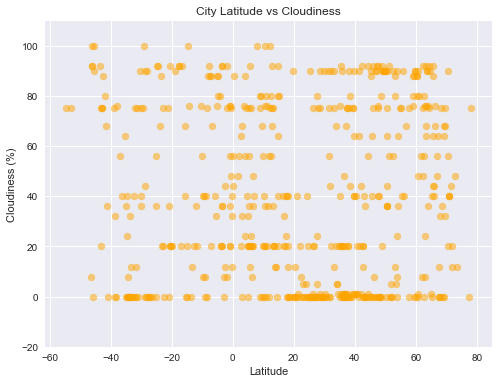

In [15]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], color='orange', alpha=0.5)
plt.ylim(-20,(WeatherPy_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

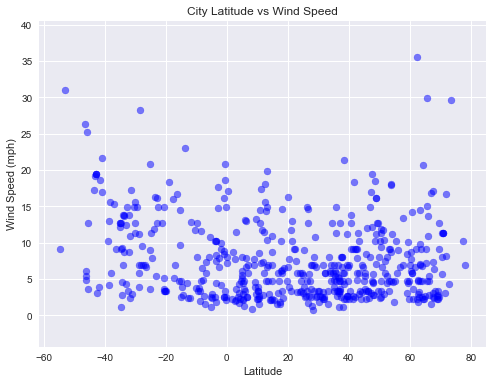

In [18]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], color='blue', alpha=0.5)
plt.ylim((WeatherPy_df["Wind Speed"].min()-5),(WeatherPy_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed')
plt.show()